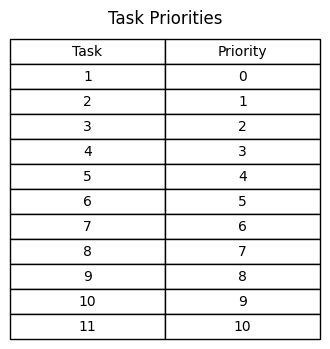

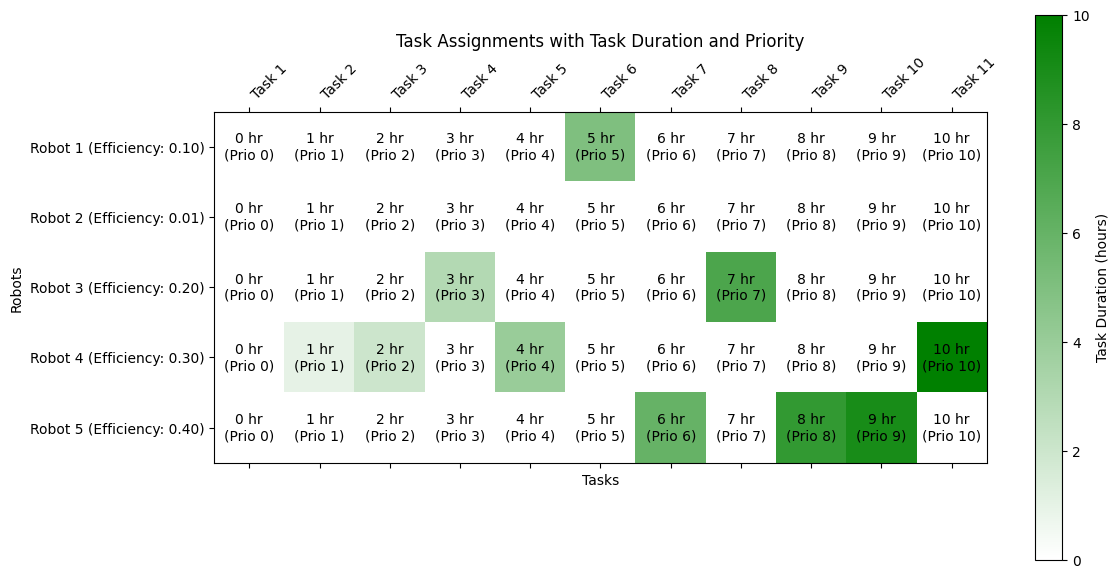

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches


# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = [x for x in range(11)]# Task durations
    task_priorities = [x for x in range(11)]   # Task priorities
    robot_efficiencies = [0.1,0.01,0.2,0.3,0.4] # Robot efficiencies
    return task_durations, task_priorities, robot_efficiencies

# Function to display task priorities as a table of data
def display_task_priorities(task_priorities):
    num_tasks = len(task_priorities)
    fig, ax = plt.subplots(figsize=(4, 3))  # Adjust the figure size as needed
    ax.axis('off')  # Hide axis

    table_data = [["Task", "Priority"]]
    for i in range(num_tasks):
        table_data.append([f"{i+1}", f"{task_priorities[i]}"])

    table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size as needed
    table.scale(1, 1.5)  # Adjust scaling as needed

    plt.title('Task Priorities\n\n')  # Add title if desired
    plt.show()

# Placeholder for the fitness function calculation
def calculate_fitness(solution, task_durations, task_priorities, robot_efficiencies):
    # Calculate total production time for each robot
    robot_times = np.zeros(len(robot_efficiencies))
    for task_idx, robot_idx in enumerate(solution):
        robot_times[robot_idx] += task_durations[task_idx] / robot_efficiencies[robot_idx]

    # Total production time is the maximum time any robot takes to complete its tasks
    total_production_time = np.max(robot_times)

    # Workload balance
    workload_balance = np.std(robot_times)

    # Fitness function: minimize total production time and workload balance
    fitness = 1 / (total_production_time + workload_balance)

    return fitness

# Placeholder for the selection process
def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(2):  # Select 2 parents
        tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        tournament_fitness = [fitness_values[i] for i in tournament_indices]
        winner_index = tournament_indices[np.argmax(tournament_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

# Placeholder for the crossover operation
def single_point_crossover(parents):
    crossover_point = np.random.randint(1, len(parents[0]))  # Choose a random crossover point
    child1 = np.concatenate((parents[0][:crossover_point], parents[1][crossover_point:]))
    child2 = np.concatenate((parents[1][:crossover_point], parents[0][crossover_point:]))
    return child1, child2

# Placeholder for the mutation operation
def mutation(solution, mutation_rate):
    if np.random.rand() < mutation_rate:
        idx1, idx2 = np.random.choice(len(solution), size=2, replace=False)
        solution[idx1], solution[idx2] = solution[idx2], solution[idx1]
    return solution

# GA algorithm implementation
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies):
    population_size = 50
    n_generations = 100

    population = [np.random.randint(0, len(robot_efficiencies), size=len(task_durations)) for _ in range(population_size)]
    best_solution = None
    best_fitness = float('-inf')

    for _ in range(n_generations):
        # Evaluate fitness for each individual in the population
        fitness_values = [calculate_fitness(sol, task_durations, task_priorities, robot_efficiencies) for sol in population]

        # Select parents for crossover using tournament selection
        selected_parents = [tournament_selection(population, fitness_values, tournament_size=5) for _ in range(population_size // 2)]

        # Perform crossover to generate offspring
        offspring_population = [single_point_crossover(parents) for parents in selected_parents]
        offspring_population = [child for pair in offspring_population for child in pair]  # Flatten list of offspring

        # Apply mutation to the offspring
        offspring_population = [mutation(child, mutation_rate = 0.1 ) for child in offspring_population]

        # Combine parents and offspring to form the next generation
        population = offspring_population

        # Find the best solution in the current generation
        for sol, fitness in zip(population, fitness_values):
            if fitness > best_fitness:
                best_solution = sol
                best_fitness = fitness

    return best_solution

# Improved visualization function
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    # Create a grid for visualization based on the solution provided
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    for task_idx, robot_idx in enumerate(solution):
        grid[robot_idx, task_idx] = task_durations[task_idx]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "green"])  # Changed color intensity to green

    # Display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # Annotate each cell with task priority and duration
    for i in range(len(robot_efficiencies)):
        for j in range(len(task_durations)):
            ax.text(j, i, f'{task_durations[j]} hr\n(Prio {task_priorities[j]})',  # Changed display format
                    ha='center', va='center', color='black')

    # Set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 3
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Display the task priorities as a table of data in a separate output window
    display_task_priorities(task_priorities)

    print("\n")

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies)

    # Visualize the best solution
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
